In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn import metrics
from nltk.corpus import stopwords
import math
from sklearn import manifold
import scipy

Programa que muestra ejemplos gráficos con Machine Learning
Opciones:
1.Impresión de similitud de documentos por método de coseno (Intersección de circunferencias)
2.Clustering de distancia entre documntos
3.Clustering de documentos en 3D
4.Similitud entre documentos (Dibujar distancia entre ellos)
1
Corroborar tamaño de la matriz Documentos vs Términos
(8, 5248)
Obteniendo similitud de coseno entre 2 documentos (si son iguales el valor es 1)
[[0.98316399]]
Cálculo de distancia
[[0.01683601]]
Ángulo de separación de los documentos (grados)
10.528546369768543
Área de gráficos
Similitud entre documentos (Dibujar distancia entre ellos)
Inicio


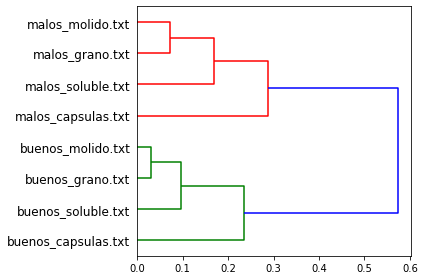

Fin


In [19]:
def ejecutarPrograma(opcion):
   
   '''
   Pasar archivos a una lista
   '''
   path='C:/Users/Armando/Desktop/prueba2'
   documents = [] #los ordena por nombre
   titles=[]
   dirs = os.listdir(path)
   for doc in dirs:
       if doc.endswith('.txt'):
           titles.append(doc)
           f=open(os.path.join(path,doc),'r')
           words = f.read()
           documents.append(words)
           f.close()


   #Genera stopwords
   sw=stopwords.words('spanish')


   #Crea los vectores ya sin stopwords y genera matriz tf-idf
   tfidf_vectorizer = TfidfVectorizer(sw)
   tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

   #Se crea diccionario
   diccionario = tfidf_vectorizer.get_feature_names()

   print
   print ('Corroborar tamaño de la matriz Documentos vs Términos')
   print (tfidf_matrix.shape)
   print


   print
   print ('Obteniendo similitud de coseno entre 2 documentos (si son iguales el valor es 1)')
   cosine=cosine_similarity(tfidf_matrix[1:2], tfidf_matrix[2:3])
   print (cosine)
   print ('Cálculo de distancia')
   dist = 1 - cosine
   print (dist)
   print
   print ('Ángulo de separación de los documentos (grados)')
   angle_in_radians = math.acos(cosine)
   print (math.degrees(angle_in_radians))
   print
   print ('Área de gráficos')
   print
   dist = 1 - cosine_similarity(tfidf_matrix)
   np.round(dist, 2)
   if opcion==1:
       print ('Inicio')
       print ('Impresión de similitud de documentos por método de coseno')
       r = 1
       d = 2 * r * (1 - cosine)
       circle1=plt.Circle((0, 0), r, alpha=.5)
       circle2=plt.Circle((d, 0), r, alpha=.5)
       ## set axis limits
       plt.ylim([-1.1, 1.1])
       plt.xlim([-1.1, 1.1 + d])
       fig = plt.gcf()
       fig.gca().add_artist(circle1)
       fig.gca().add_artist(circle2)
       print ('Fin')
   elif opcion==2:
       print ('Inicio')
       print ('Clustering de distancia entre documntos')
       mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
       pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
       xs, ys = pos[:, 0], pos[:, 1]
       names = [os.path.basename(fn).replace('.txt', '') for fn in titles]
       # color-blind-friendly palette
       for x, y, name in zip(xs, ys, names):
          color = 'orange' if "d1" in name else 'blue'
          plt.scatter(x, y, c=color)
          plt.text(x, y, name)
       plt.show()
       print ('Fin')
   elif opcion==3:
       print ('Inicio')
       print ('Clustering de documentos en 3D')
       mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
       pos = mds.fit_transform(dist)
       fig = plt.figure()
       ax = fig.add_subplot(111, projection='3d')
       ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
       for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], titles):
           ax.text(x, y, z, s)
       plt.show()
       print ('Fin')
   else:
       print ('Similitud entre documentos (Dibujar distancia entre ellos)')
       print ('Inicio')
       linkage_matrix = ward(dist)
       dendrogram(linkage_matrix, orientation="right", labels=titles)
       plt.tight_layout()
       plt.show()
       print ('Fin')


print ('Programa que muestra ejemplos gráficos con Machine Learning')
print ('Opciones:')
print ('1.Impresión de similitud de documentos por método de coseno (Intersección de circunferencias)')
print ('2.Clustering de distancia entre documntos')
print ('3.Clustering de documentos en 3D')
print ('4.Similitud entre documentos (Dibujar distancia entre ellos)')
opcion=input()

ejecutarPrograma(opcion)

In [15]:
   path='C:/Users/Armando/Desktop/prueba2'
   documents = []
   titles=[]
   dirs = os.listdir(path)
   for doc in dirs:
       if doc.endswith('.txt'):
           titles.append(doc)
           f=open(os.path.join(path,doc),'r')
           words = f.read()
           documents.append(words)
           f.close()

In [17]:
documents[7]

'El frasco llego quebrado.\nNunca llego a mi casa.\nApenas y sabe a café, muy maldito...\nEl sabor es muy malo. Muy artificial.\nLlega en muy mal estado, el frasco quebrado. Aparte no hay devolución.\nAl final me hicieron devolución  pero igual me quedé sin mi café.\nNo me gustó el sabor de caramelo, cuestión de gustos, el precio bien.\nPésima la logistica de envíos, el producto está roto y no hay devolución.\nEl frasco me llegó todo roto de un lateral y no me permite devolverlo.\nPésimo servicio, no me llegó el producto pedí etiqueta roja y me llegó verde.Pésimo servicio.\nTerrible el empaque, llego quebrado el frasco y imposible rescatar el vafe con tanto vidrio.\nEn la publicación muestran una presentación de 100gr y me llego uno de 48gr.!! pésimo servicio.\nCompre tres piezas y una venía abierta sin el sello de calidad. Amazon no me permitió la devolución.\nCambio muchísimo el sabor.No es sabroso, incluso el olor del café es diferente al que probé la primera vez.\nNo se supone que 